In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

In [10]:
raw_data = pd.read_excel('Concrete_Data.xls')
raw_data.columns = [col.split('(')[0] for col in raw_data.columns] #rename the columns to take words before the first "("
raw_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [11]:
#2 basic summary of attributes

Descriptive_stats=raw_data.describe().round(2) #summary statistics
Descriptive_stats.to_csv('IMDMM_A1_Descriptive_stats.csv') #save the summary statistics to a csv file
Descriptive_stats

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.36,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.75,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.35,968.00,779.51,28.00,34.44
75%,350.00,142.95,118.27,192.00,10.16,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


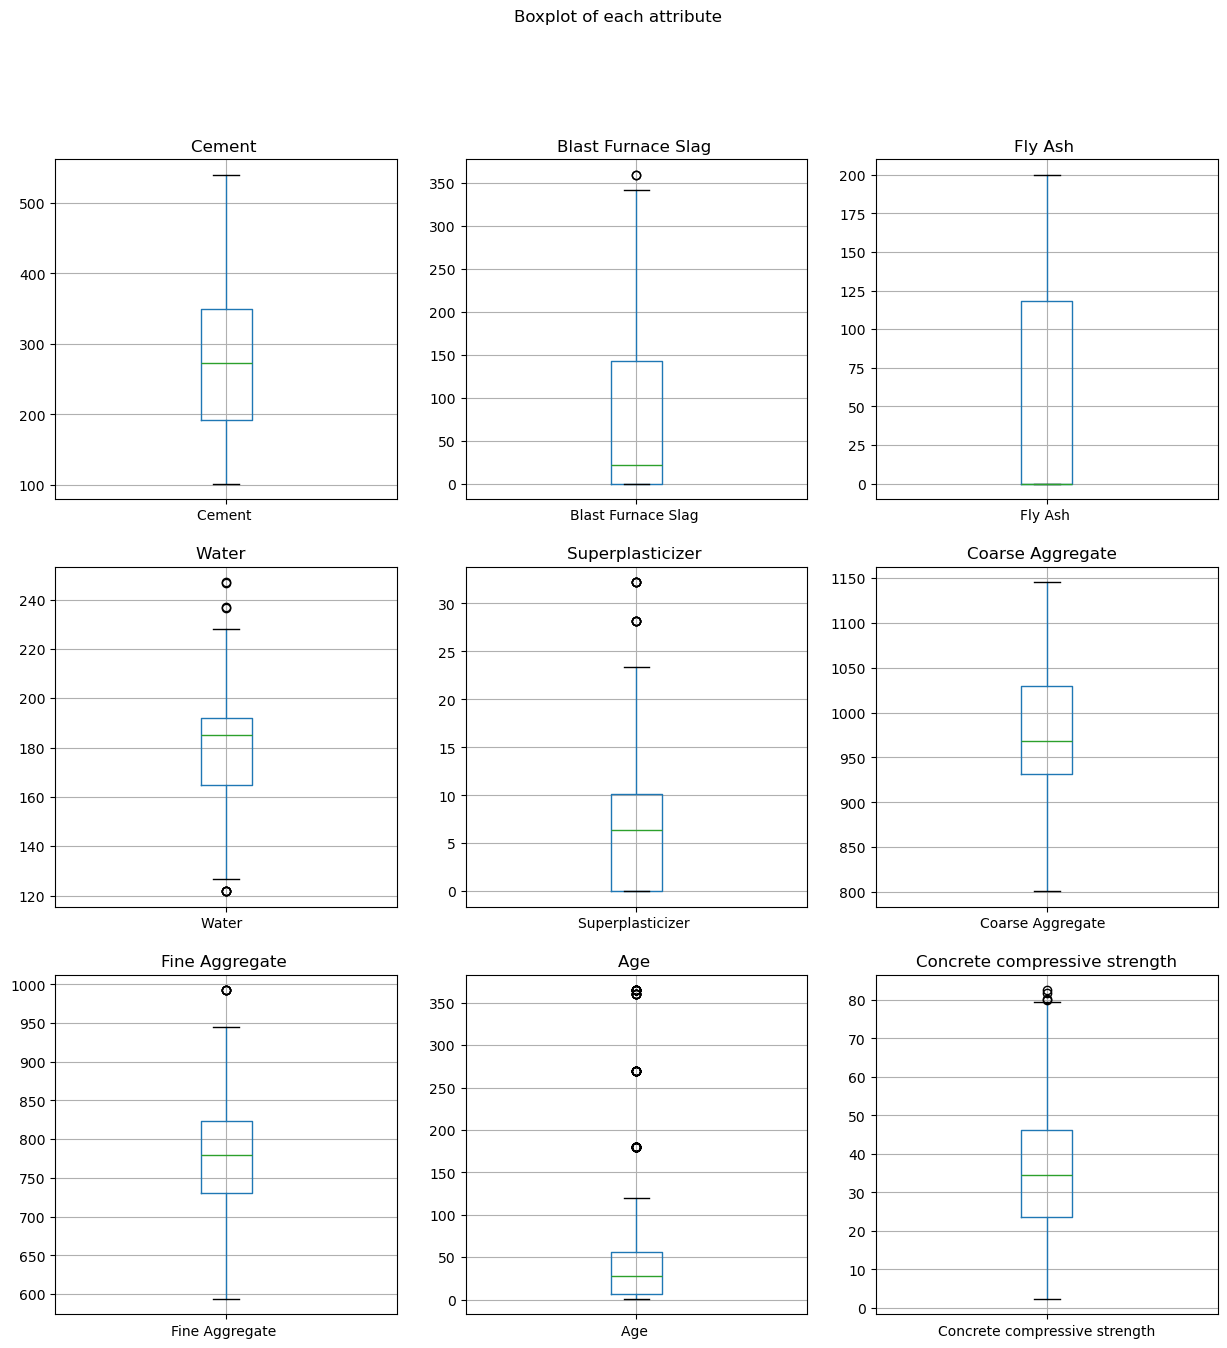

In [12]:
# 3.1 detecting outliers by creating bloxplot for each attribute
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Boxplot of each attribute')
for i, col in enumerate(raw_data.columns):
    raw_data.boxplot(column=col, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(col)
plt.show()

In [14]:
# 3.2 Testing whether the data is normally distributed
jb_stat = {}
p_value = {}
Normally_distributed = {}

kurtosis = raw_data.kurtosis()
skewness = raw_data.skew()
KS_df = pd.DataFrame({'Kurtosis': kurtosis, 'Skewness': skewness})

for column in raw_data.columns:
    jb_stat[column], p_value[column] = ss.jarque_bera(raw_data[column])
    if p_value[column] > 0.05:
        Normally_distributed[column] = 'Yes'
    else:
        Normally_distributed[column] = 'No'
jb_stat_df = pd.DataFrame(jb_stat, index=['JB Statistic']).T
p_value_df = pd.DataFrame(p_value, index=['p-value']).T
Normally_distributed_df = pd.DataFrame(Normally_distributed, index=['Normally Distributed']).T

JB_result = pd.concat([KS_df, jb_stat_df, p_value_df, Normally_distributed_df], axis=1)
JB_result

,Kurtosis,Skewness,JB Statistic,p-value,Normally Distributed
Cement,-0.520663,0.509517,56.218315,6.199377e-13,No
Blast Furnace Slag,-0.508139,0.800737,120.976985,5.372564e-27,No
Fly Ash,-1.328505,0.537445,125.115002,6.786137e-28,No
Water,0.122676,0.074324,1.525633,4.663510e-01,Yes
Superplasticizer,1.413186,0.908113,225.334526,1.172815e-49,No
Coarse Aggregate,-0.599001,-0.040206,15.825549,3.660376e-04,No
Fine Aggregate,-0.102165,-0.252979,11.450280,3.262897e-03,No
Age,12.168989,3.269177,8117.116989,0.000000e+00,No
Concrete compressive strength,-0.313844,0.416922,34.096713,3.944509e-08,No


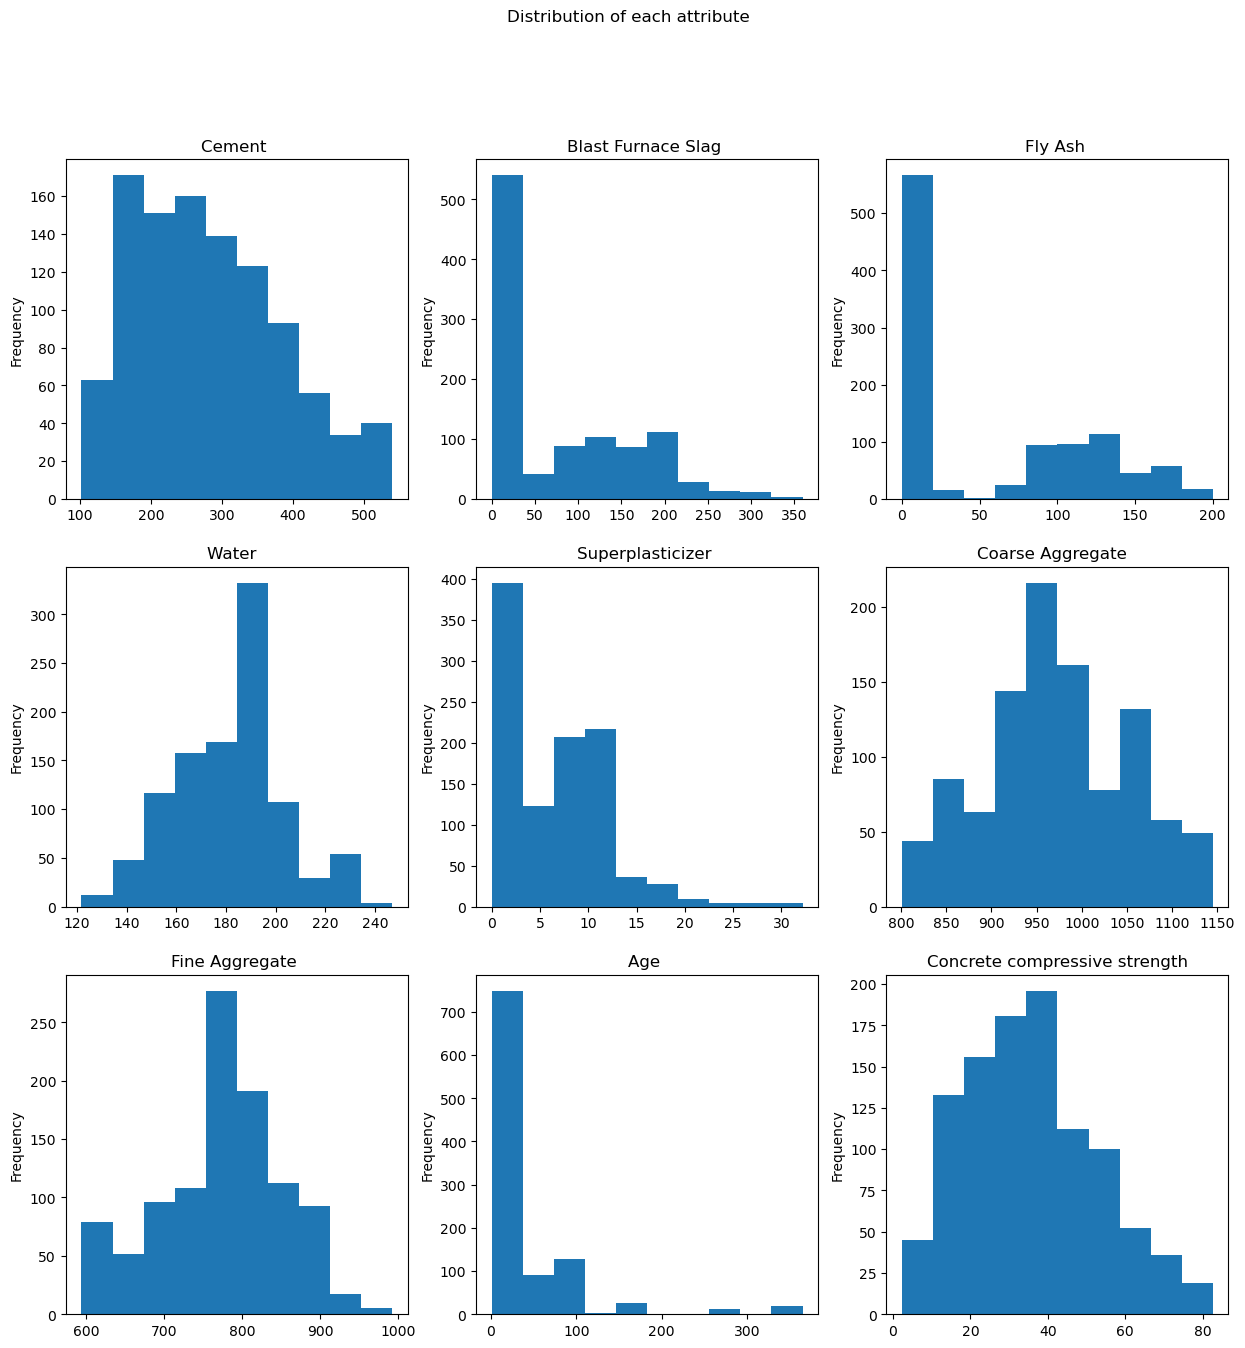

In [15]:
# 3.2 Showing the distribution of each attribute
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Distribution of each attribute')
for i, col in enumerate(raw_data.columns):
    raw_data[col].plot(kind='hist', ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(col)
plt.show()

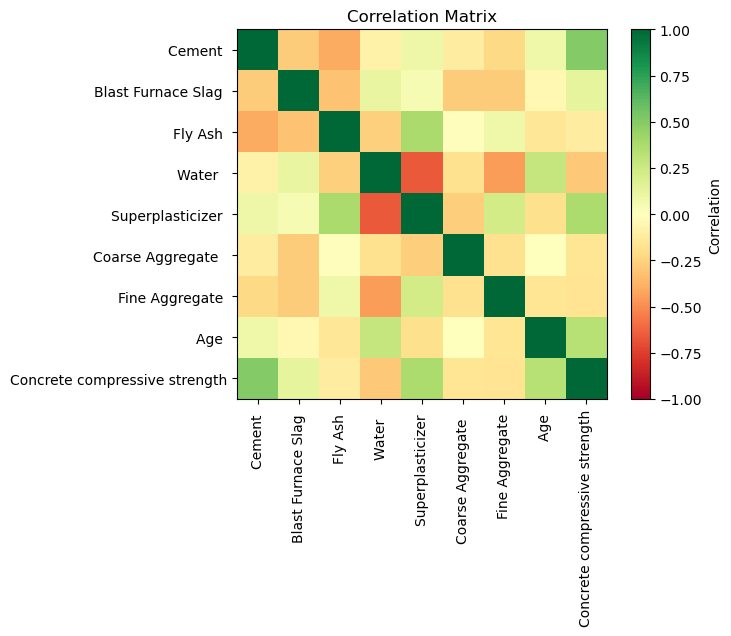

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
Blast Furnace Slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
Fly Ash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
Water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
Superplasticizer,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
Coarse Aggregate,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
Fine Aggregate,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
Age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
Concrete compressive strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


In [18]:
# 3.3 Calculate the correlation matrix
correlation = raw_data.corr().round(2)

cmap = plt.cm.RdYlGn
plt.imshow(correlation, cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix.png',bbox_inches = 'tight')
plt.show()

correlation

In [ ]:
standardized_data = (raw_data - raw_data.mean()) / raw_data.std()